### Short strangle with delta hedging

https://zerodha.com/varsity/chapter/the-long-short-strangle/

Coming to the reality we can't predict market accurately and it may lead to loss.<br/>
So in practice market neutral strategies are very helpful and can give decent returns with very less risk<br/>
One such strategy is to sell put and call options such that the overall delta of our positions remains 0.

Try to code the above strategy and manage delta just like given in the previous strategy.<br/>
You will only use 35000 puts and calls for this strategy.<br/>
Initially sell 10 lots of puts and correspondingly sell x lots of calls such that the delta becomes 0.<br/>
Then manage the delta accordingly by just selling or buying call options and not changing the number of put options sold.<br/>
Also plot the profit graph on whole data and see the results!<br/>

Hint: Do remember that unlike futures which has delta of 1 delta of 35000 puts options would change everytime.

## Importing important libraries

In [1]:
pip install py_vollib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 5.1 MB/s eta 0:00:00
  Created wheel for py_vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62855 sha256=6c6598fe5f99361da6b0fc65b2c4e32f3171ce7f06e995346b69c6195dffeaa5
  Stored in directory: /root/.cache/pip/wheels/38/8d/d9/a680031767bd6a3d734fc7c48a75767591795e47ac66ca143c
  Created wheel for py_lets_be_rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24470 sha256=54d9fb67b4fd23d2c2271de06fd86001628f2325bd6dca7805a4a48191c8c298
  Stored in directory: /root/.cache/pip/wheels/e6/67/1e/93e41aebf34e4fd3cb02a865e9c782c9edaac5051f15a01d2e
Successfully built py_vollib py_lets_be_rational


In [3]:
pip install py yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 15.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import scipy.stats as ss

import py_vollib.black_scholes.greeks.analytical as derivatives

import math

### Initialising everything required to calculate delta

In [9]:
df_call_35000 = pd.read_csv('/OPTIDX_BANKNIFTY_CE_28-May-2021_TO_24-Jun-2021_1.csv')
df_call_35000.rename(columns = {'Premium Turnover in Lacs':'Premium'}, inplace = True)
df_call_35000.rename(columns = {'Underlying Value':'Underlying_Value'}, inplace = True)
df_call_35000.head()

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium,Open Int,Change in OI,Underlying_Value
0,BANKNIFTY,28-May-2021,24-Jun-2021,CE,35000,1394.65,1459.5,1132.0,1213.55,1224.50,1213.55,18138,164479.84,5772.34,283425,39000,35141.45
1,BANKNIFTY,31-May-2021,24-Jun-2021,CE,35000,1197.95,1339.0,1021.6,1308.30,1281.95,1308.30,14456,130864.56,4374.56,245275,-38150,-
2,BANKNIFTY,01-Jun-2021,24-Jun-2021,CE,35000,1291.90,1398.0,1112.3,1155.05,1163.00,1155.05,15231,137967.95,4696.70,345025,99750,-
3,BANKNIFTY,02-Jun-2021,24-Jun-2021,CE,35000,1099.30,1145.7,982.5,1128.05,1122.00,1128.05,12258,110507.46,3249.96,342375,-2650,-
4,BANKNIFTY,03-Jun-2021,24-Jun-2021,CE,35000,1163.20,1342.5,1111.7,1265.45,1270.00,1265.45,7511,68025.76,2304.51,307825,-34550,-


In [10]:
df_put_35000 = pd.read_csv('/OPTIDX_BANKNIFTY_PE_28-May-2021_TO_24-Jun-2021.csv')
df_put_35000.rename(columns = {'Premium Turnover in Lacs':'Premium'}, inplace = True)

df_put_35000.head()

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium,Open Int,Change in OI,Underlying Value
0,BANKNIFTY,28-May-2021,24-Jun-2021,PE,35000,940.00,984.85,820.20,907.15,856.0,907.15,30957,277944.81,7071.06,217275,-3850,35141.45
1,BANKNIFTY,31-May-2021,24-Jun-2021,PE,35000,886.00,975.50,690.45,706.40,713.9,706.40,22393,200373.31,4434.56,215875,-1400,-
2,BANKNIFTY,01-Jun-2021,24-Jun-2021,PE,35000,682.35,795.25,605.40,701.25,697.0,701.25,22207,198214.51,3903.26,245775,29900,-
3,BANKNIFTY,02-Jun-2021,24-Jun-2021,PE,35000,747.50,799.95,581.80,601.55,587.7,601.55,18375,164002.20,3220.95,235300,-10475,-
4,BANKNIFTY,03-Jun-2021,24-Jun-2021,PE,35000,486.50,564.00,447.15,484.85,489.0,484.85,19913,176748.22,2509.47,217500,-17800,-


### Initialising everything required to calculate delta

In [20]:
#Assume we are starting the strategy at the opening time of 28th May
S =  df_call_35000.Underlying_Value[0]  #price of the underlying

K = 35000   #strike price
date1= df_call_35000.Date[0]
date2= df_call_35000.Expiry[0]
t = pd.to_datetime(date2)- pd.to_datetime(date1)
r=0.06
delta_to_maintain = 0.3
vol=10 
sigma =vol


### Initial selling

In [21]:
no_of_lots_put = 10      #number of lots of put sold
sell_avg_put = df_put_35000['Open'][0]   #_______   selling average of seeling those lots
lot_size = 25
delta =1*no_of_lots_put*lot_size   #  ______  total delta after selling 250 quantities of put
sell_avg_put

940.0

In [22]:
delta

250

In [23]:
delta_per_lot_call = delta*no_of_lots_put #_______  #delta per lot of call,i.e, delta of 25 quantities
delta_per_lot_call

2500

In [24]:
number_of_lots_call = delta_per_lot_call/delta    #number of lots of call to be sold
number_of_lots_call

10.0

In [18]:
sell_avg_call = df_call_35000['Open'][0]   #selling average of that call options sold
sell_avg_call

1394.65

In [26]:
#length of the data
len(df_put_35000)

20

In [ ]:
#Before delta management ans few questions:

#Q1. If market moves up, what would happen to delta of put options? (increase/decrease)
#Ans : decrease 

#Q2. If market moves up, what would happen to delta of call options? (increase/decrease)
#Ans : increase

#Q3. What would be your ideal strategy in terms of buying/selling call options if market moves up to maintain a delta of 0.
#Ans :buy more options at today price

'''
Bonus Question: Assume that you have set a limit to selling of your quantities and you have reached that limit of yours.
Now the market went up. You have to manage your delta such that the final quantity sold by you remains the same.
What would you do?
Hint : Think about changing the strikes of options

Ans : ______
'''

### Delta Management

In [28]:
number_of_lots_call =  number_of_lots_call  #number of call lots to be sold(same as above)
sell_avg_call = sell_avg_call  #selling average(same as above)
profit = []

#Write the code for delta management

for i in range(len(df_put_35000)-1):
    delta_per_lot_call = df_call_35000.Premium - df_call_35000.Close #Calculate delta per lot at the next closing day
    current_number_of_lots_call = delta_per_lot_call/delta  #number of lots required to sell
    no_of_lots_added = number_of_lots_call  -  current_number_of_lots_call#number of lots added/subtracted for selling
    sell_avg_call = df_call_35000['Open'][0]  #new selling avg of call
    number_of_lots_call = number_of_lots_call+no_of_lots_added #update number of lots of calls sold
    profit.append((df_put_35000['Close'][i]-sell_avg_call)*no_of_lots_put*10 + (sell_avg_call-df_call_35000['Close'][i])*10*number_of_lots_call)  #unrealised profit 
    

In [ ]:
profit.append(_____)  #profit at the expiry as at expiry delta is not done and therefore cannot be calculated in the above loop

In [29]:
profit

[0     -45553.87476
 1     -34741.98744
 2     -38185.71260
 3     -27901.11604
 4     -20056.95064
 5     -26054.76532
 6     -22787.06936
 7     -41923.47172
 8     -61991.66980
 9     -56286.58516
 10    -48032.33692
 11    -64305.54828
 12    -63977.90216
 13    -82748.62740
 14   -119674.70008
 15   -335377.54952
 16   -325361.99512
 17   -900476.48408
 18   -423122.02076
 19   -275711.98132
 dtype: float64, 0    -8.152318e+04
 1    -6.605759e+04
 2    -7.098358e+04
 3    -5.627223e+04
 4    -4.505174e+04
 5    -5.363116e+04
 6    -4.895697e+04
 7    -7.633016e+04
 8    -1.050362e+05
 9    -9.687552e+04
 10   -8.506844e+04
 11   -1.083460e+05
 12   -1.078774e+05
 13   -1.347275e+05
 14   -1.875475e+05
 15   -4.960943e+05
 16   -4.817678e+05
 17   -1.304426e+06
 18   -6.216062e+05
 19   -4.107471e+05
 dtype: float64, 0    -1.835001e+05
 1    -8.336925e+04
 2    -1.152622e+05
 3    -2.001470e+04
 4     5.263154e+04
 5    -2.915309e+03
 6     2.734742e+04
 7    -1.498783e+05
 8    -3

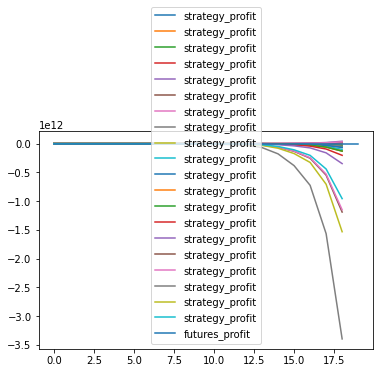

In [32]:
#Plot the profit graph
plt.plot(profit[:20], label = 'strategy_profit')
plt.plot((df_put_35000['Close']-df_put_35000['Open'][0])[:20]*250, label = 'futures_profit')
plt.legend()

See the results you get by selling calls and puts and just managing delta at end of day